In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show


In [3]:
df_inflacao = pd.read_csv("PrecoTaxaTesouroDireto.csv", sep=";")
df_TaxaDesemprego = pd.read_csv("Desemprego.csv", sep=";")
df_salarioMinimo = pd.read_csv('Salario Minimo.csv', sep=';', encoding= "ANSI")

In [4]:
df_inflacao.head()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Prefixado com Juros Semestrais,01/01/2013,18/10/2011,"10,66","10,7","1022,21","1021,79","1021,38"
1,Tesouro Selic,07/03/2013,17/10/2011,0,"0,02","4913,64","4912,29","4910,07"
2,Tesouro Selic,07/03/2012,17/10/2011,0,"0,01","4913,64","4913,45","4911,24"
3,Tesouro Selic,07/03/2015,17/10/2011,0,"0,04","4913,64","4906,99","4904,78"
4,Tesouro Selic,07/03/2017,17/10/2011,0,"0,04","4913,64","4903,09","4900,88"


In [5]:
df_inflacao.columns.values

array(['Tipo Titulo', 'Data Vencimento', 'Data Base', 'Taxa Compra Manha',
       'Taxa Venda Manha', 'PU Compra Manha', 'PU Venda Manha',
       'PU Base Manha'], dtype=object)

In [6]:
df_inflacao_colunas = ['Tipo Titulo','Data Vencimento', 'Taxa Compra Manha',
       'Taxa Venda Manha']
df_inflacao_filtrada = df_inflacao.filter(items=df_inflacao_colunas)
df_inflacao_filtrada

,Tipo Titulo,Data Vencimento,Taxa Compra Manha,Taxa Venda Manha
0,Tesouro Prefixado com Juros Semestrais,01/01/2013,"10,66","10,7"
1,Tesouro Selic,07/03/2013,0,"0,02"
2,Tesouro Selic,07/03/2012,0,"0,01"
3,Tesouro Selic,07/03/2015,0,"0,04"
4,Tesouro Selic,07/03/2017,0,"0,04"
...,...,...,...,...
135599,Tesouro Selic,07/03/2013,0,"0,02"
135600,Tesouro Selic,07/03/2014,0,"0,03"
135601,Tesouro Selic,07/03/2015,0,"0,04"
135602,Tesouro Prefixado,01/01/2015,"12,7","12,76"


In [7]:
coluna_tipo = df_inflacao_filtrada['Tipo Titulo']
coluna_tipo.value_counts().sort_index()

Tipo Titulo
Tesouro Educa+                             1056
Tesouro IGPM+ com Juros Semestrais        15078
Tesouro IPCA+                             14824
Tesouro IPCA+ com Juros Semestrais        37494
Tesouro Prefixado                         24295
Tesouro Prefixado com Juros Semestrais    23297
Tesouro Renda+ Aposentadoria Extra         1528
Tesouro Selic                             18032
Name: count, dtype: int64

In [8]:
TaxaIPCA = df_inflacao_filtrada[df_inflacao_filtrada['Tipo Titulo'] == 'Tesouro IPCA+'] 
TaxaIPCA_colunas = ['Data Vencimento', 'Taxa Compra Manha',
       'Taxa Venda Manha']
TaxaIPCA_filtrada = TaxaIPCA.filter(items=TaxaIPCA_colunas)
TaxaIPCA_filtrada.dtypes
TaxaIPCA_filtrada.groupby('Data Vencimento').head()

,Data Vencimento,Taxa Compra Manha,Taxa Venda Manha
18,15/05/2035,"5,65","5,75"
19,15/08/2024,"5,68","5,76"
20,15/05/2015,"5,07","5,11"
46,15/05/2035,"5,65","5,75"
47,15/08/2024,"5,63","5,71"
48,15/05/2015,"4,97","5,01"
74,15/08/2024,"5,62","5,7"
75,15/05/2015,"4,89","4,93"
76,15/05/2035,"5,67","5,77"
81,15/05/2015,"5,18","5,22"


In [9]:
TaxaIPCA_filtrada.columns.values

array(['Data Vencimento', 'Taxa Compra Manha', 'Taxa Venda Manha'],
      dtype=object)

In [10]:
TaxaIPCA_filtrada['Data Vencimento']= pd.to_datetime(TaxaIPCA_filtrada['Data Vencimento'])
def trocaVirgula(X):
    return str(X).replace(',','.')

TaxaIPCA_filtrada['Taxa Compra Manha'] = TaxaIPCA_filtrada['Taxa Compra Manha'].apply(trocaVirgula)
TaxaIPCA_filtrada['Taxa Venda Manha'] = TaxaIPCA_filtrada['Taxa Venda Manha'].apply(trocaVirgula)

TaxaIPCA_filtrada['Taxa Compra Manha'] = pd.to_numeric(TaxaIPCA_filtrada['Taxa Compra Manha'])
TaxaIPCA_filtrada['Taxa Venda Manha'] = pd.to_numeric(TaxaIPCA_filtrada['Taxa Venda Manha'])

TaxaIPCA_filtrada.dtypes


C:\Users\Windows\AppData\Local\Temp\ipykernel_15588\1884563973.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TaxaIPCA_filtrada['Data Vencimento']= pd.to_datetime(TaxaIPCA_filtrada['Data Vencimento'])


Data Vencimento      datetime64[ns]
Taxa Compra Manha           float64
Taxa Venda Manha            float64
dtype: object

In [11]:
df = pd.DataFrame(TaxaIPCA_filtrada)


df_agrupado = df.groupby('Data Vencimento').agg({'Taxa Compra Manha': 'mean', 'Taxa Venda Manha': 'mean'}).reset_index()

print(df_agrupado)

  Data Vencimento  Taxa Compra Manha  Taxa Venda Manha
0      2015-05-15           5.975138          6.020924
1      2019-05-15           4.844335          4.919361
2      2024-08-15           5.681270          5.773962
3      2026-08-15           4.494398          4.614398
4      2029-05-15           5.576311          5.696311
5      2035-05-15           5.372344          5.480584
6      2045-05-15           4.929875          5.049875


In [12]:
print(df_agrupado.columns)
print(df_agrupado.head())

Index(['Data Vencimento', 'Taxa Compra Manha', 'Taxa Venda Manha'], dtype='object')
  Data Vencimento  Taxa Compra Manha  Taxa Venda Manha
0      2015-05-15           5.975138          6.020924
1      2019-05-15           4.844335          4.919361
2      2024-08-15           5.681270          5.773962
3      2026-08-15           4.494398          4.614398
4      2029-05-15           5.576311          5.696311


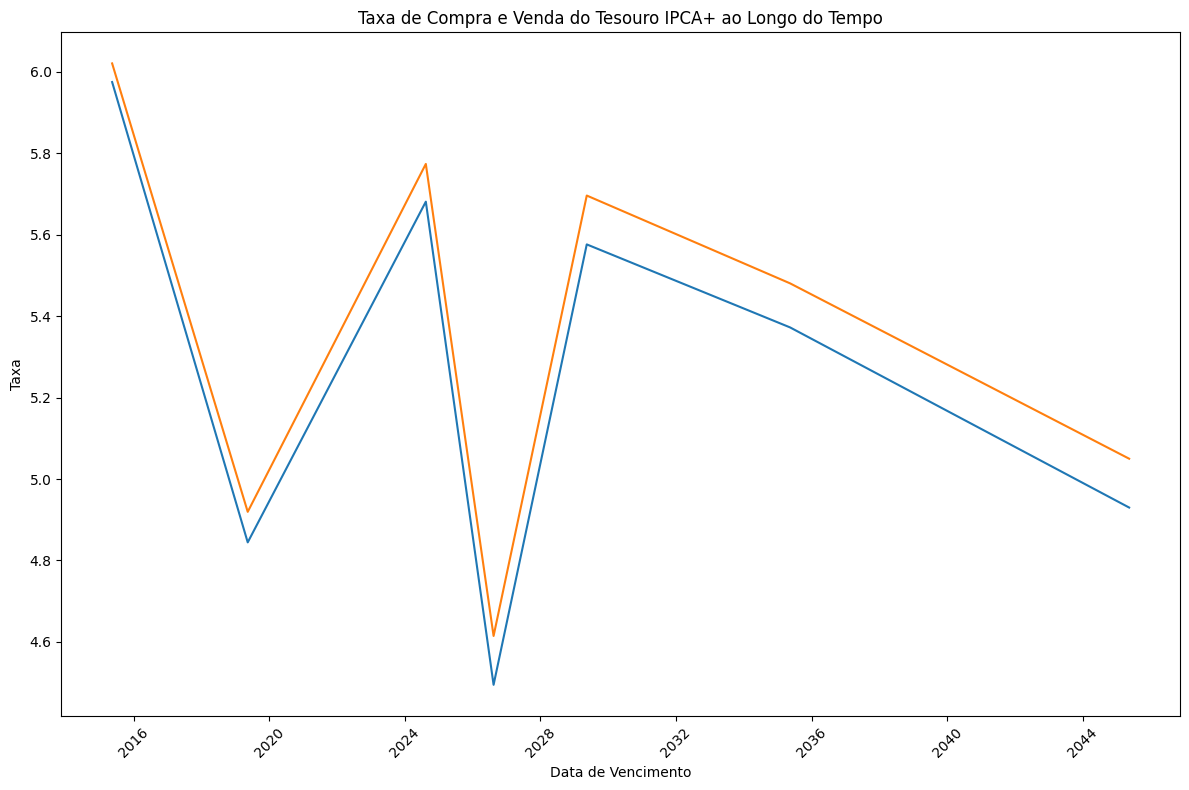

In [13]:
print()
plt.figure(figsize=(12, 8))
plt.plot(df_agrupado['Data Vencimento'], df_agrupado['Taxa Compra Manha'], label='Taxa Compra Manha')
plt.plot(df_agrupado['Data Vencimento'], df_agrupado['Taxa Venda Manha'], label='Taxa Venda Manha')

plt.title('Taxa de Compra e Venda do Tesouro IPCA+ ao Longo do Tempo')
plt.xlabel('Data de Vencimento')
plt.ylabel('Taxa')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

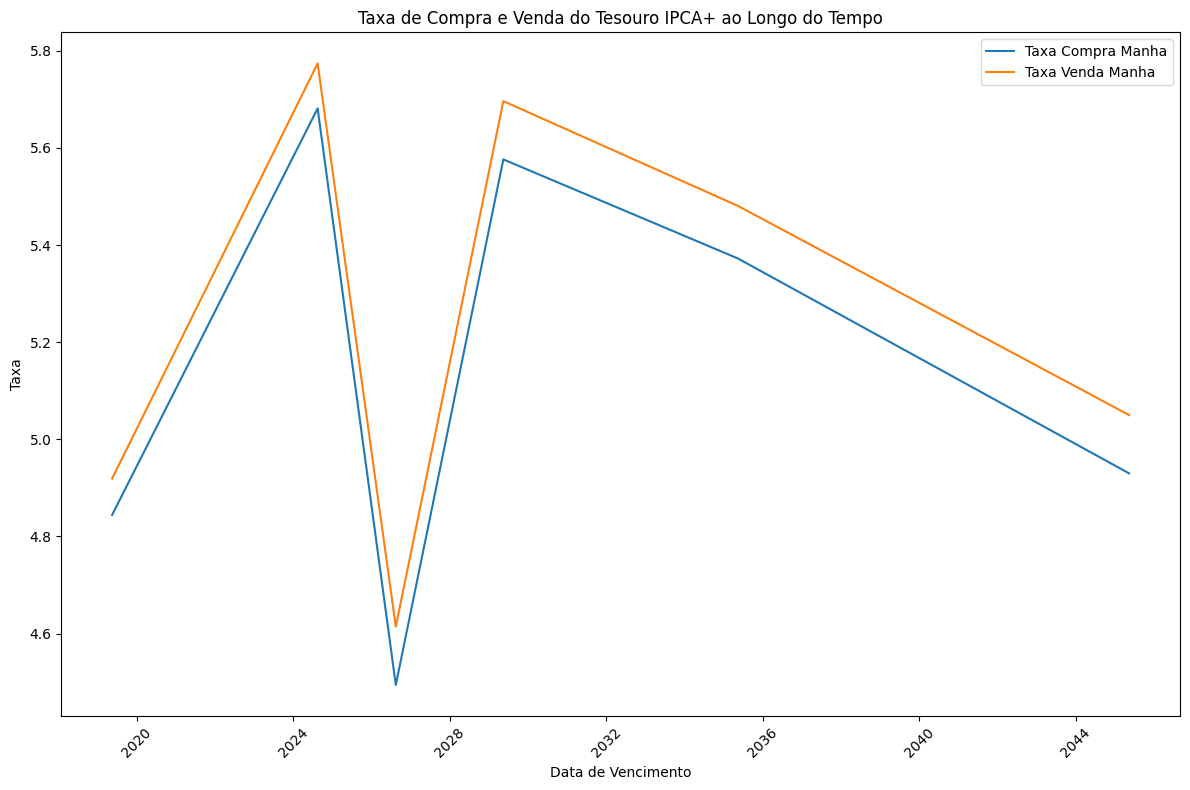

In [14]:
import matplotlib.pyplot as plt

# Supondo que 'df_agrupado' seja o seu DataFrame com as colunas 'Data Vencimento', 'Taxa Compra Manha' e 'Taxa Venda Manha'
# Certifique-se de que 'Data Vencimento' é uma coluna do tipo datetime

# Filtrar para incluir apenas dados a partir de 2016
df_agrupado_filtrado = df_agrupado[df_agrupado['Data Vencimento'].dt.year >= 2016]

# Criar um gráfico de linha
plt.figure(figsize=(12, 8))
plt.plot(df_agrupado_filtrado['Data Vencimento'], df_agrupado_filtrado['Taxa Compra Manha'], label='Taxa Compra Manha')
plt.plot(df_agrupado_filtrado['Data Vencimento'], df_agrupado_filtrado['Taxa Venda Manha'], label='Taxa Venda Manha')

plt.title('Taxa de Compra e Venda do Tesouro IPCA+ ao Longo do Tempo')
plt.xlabel('Data de Vencimento')
plt.ylabel('Taxa')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.legend()  # Adiciona a legenda com os rótulos especificados nos plots
plt.show()


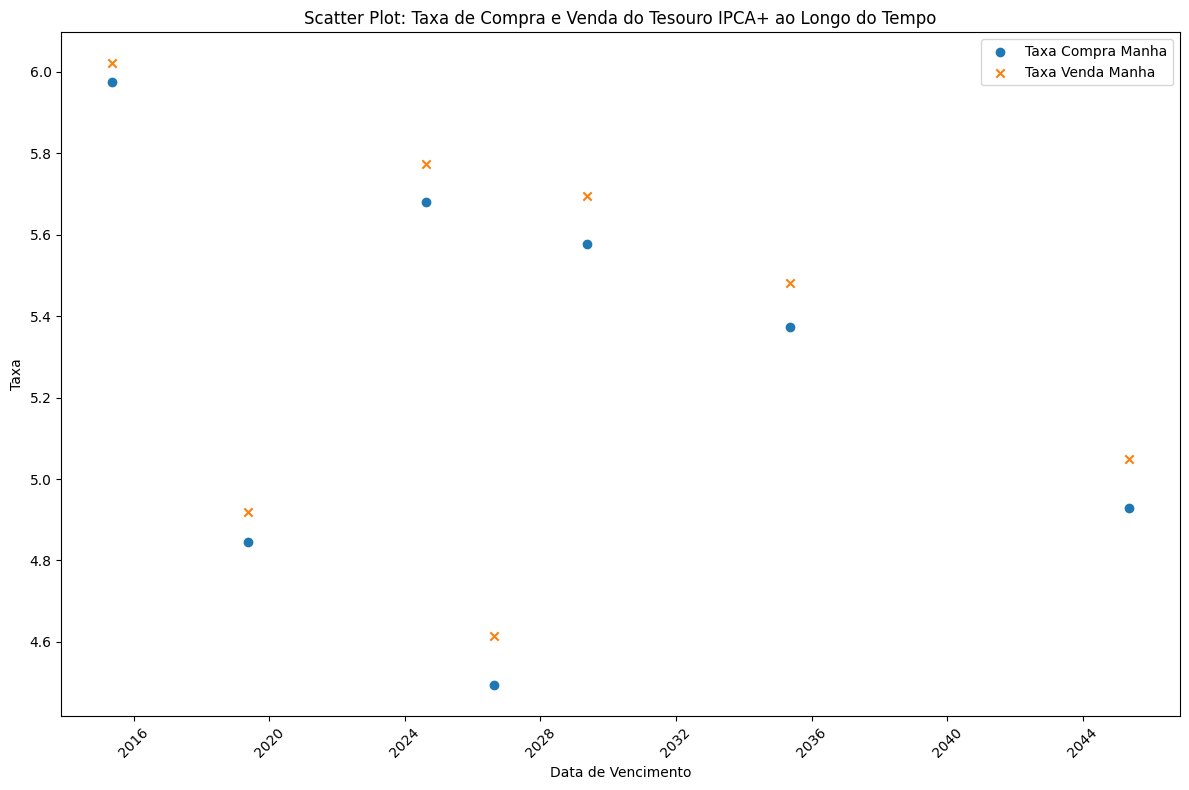

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(df_agrupado['Data Vencimento'], df_agrupado['Taxa Compra Manha'], label='Taxa Compra Manha', marker='o')
plt.scatter(df_agrupado['Data Vencimento'], df_agrupado['Taxa Venda Manha'], label='Taxa Venda Manha', marker='x')
plt.title('Scatter Plot: Taxa de Compra e Venda do Tesouro IPCA+ ao Longo do Tempo')
plt.xlabel('Data de Vencimento')
plt.ylabel('Taxa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

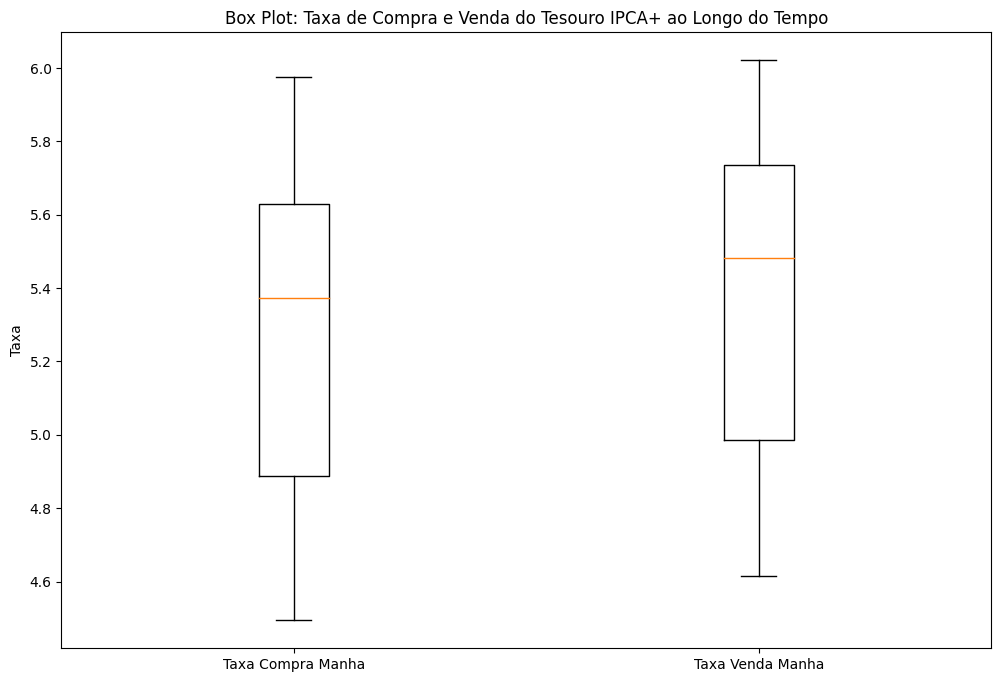

In [16]:
plt.figure(figsize=(12, 8))
plt.boxplot([df_agrupado['Taxa Compra Manha'], df_agrupado['Taxa Venda Manha']], labels=['Taxa Compra Manha', 'Taxa Venda Manha'])
plt.title('Box Plot: Taxa de Compra e Venda do Tesouro IPCA+ ao Longo do Tempo')
plt.ylabel('Taxa')
plt.show()

In [17]:
TaxaIPCA_filtrada['Taxa Compra Manha']

18        5.65
19        5.68
20        5.07
46        5.65
47        5.63
          ... 
135559    6.24
135560    6.10
135586    6.23
135587    6.09
135588    6.55
Name: Taxa Compra Manha, Length: 14824, dtype: float64

In [18]:
df_TaxaDesemprego

,TRIMESTRE,NM_UF,TX_DESOCUPACAO
0,20121,Rondônia,"8,1"
1,20121,Acre,"9,2"
2,20121,Amazonas,"11,1"
3,20121,Roraima,"8,5"
4,20121,Pará,8
...,...,...,...
1075,20214,Rio Grande do Sul,"8,1"
1076,20214,Mato Grosso do Sul,"6,4"
1077,20214,Mato Grosso,"5,9"
1078,20214,Goiás,"8,7"


In [19]:
df_TaxaDesemprego.columns.values

array(['TRIMESTRE', 'NM_UF', 'TX_DESOCUPACAO'], dtype=object)

In [20]:
df_TaxaDesemprego['ANO'] = df_TaxaDesemprego['TRIMESTRE'].astype(str).str[:4]

df_TaxaDesemprego['TX_DESOCUPACAO'] = pd.to_numeric(df_TaxaDesemprego['TX_DESOCUPACAO'].str.replace(',', '.'))

df_yearly = df_TaxaDesemprego.groupby('ANO')['TX_DESOCUPACAO'].mean().reset_index()
print(df_yearly)

    ANO  TX_DESOCUPACAO
0  2012        7.956481
1  2013        7.665741
2  2014        7.105556
3  2015        8.582407
4  2016       11.459259
5  2017       12.711111
6  2018       12.447222
7  2019       12.230556
8  2020       13.903704
9  2021       13.280556


In [21]:
df_taxaDesemprego_colunas = ['NM_UF', 'TX_DESOCUPACAO','ANO']
df_TaxaDesemprego_filtrada = df_TaxaDesemprego.filter(items=df_taxaDesemprego_colunas)
df_TaxaDesemprego_filtrada

,NM_UF,TX_DESOCUPACAO,ANO
0,Rondônia,8.1,2012
1,Acre,9.2,2012
2,Amazonas,11.1,2012
3,Roraima,8.5,2012
4,Pará,8.0,2012
...,...,...,...
1075,Rio Grande do Sul,8.1,2021
1076,Mato Grosso do Sul,6.4,2021
1077,Mato Grosso,5.9,2021
1078,Goiás,8.7,2021


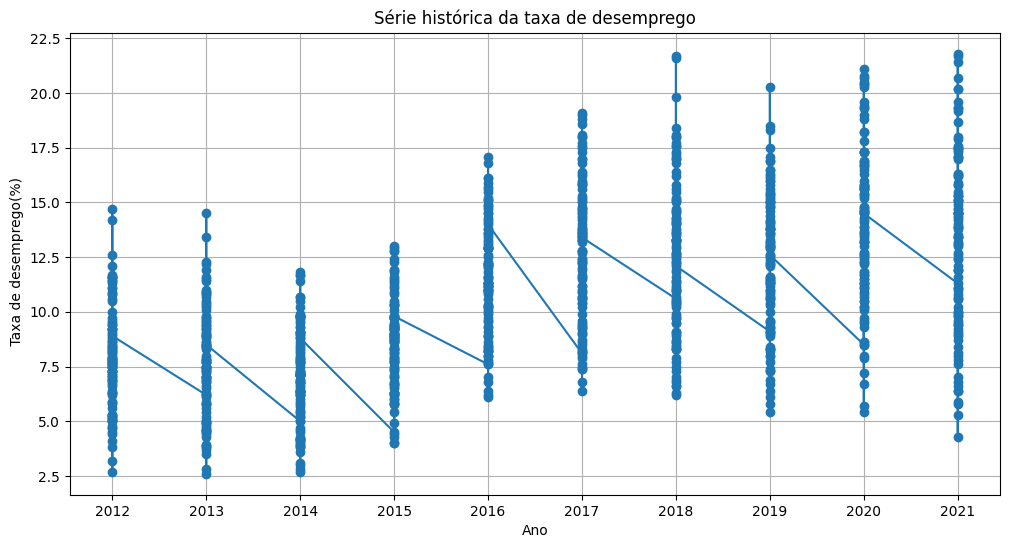

In [22]:

plt.figure(figsize=(12, 6))
plt.plot(df_TaxaDesemprego['ANO'], df_TaxaDesemprego['TX_DESOCUPACAO'], marker='o')
plt.title('Série histórica da taxa de desemprego')
plt.xlabel('Ano')
plt.ylabel(' Taxa de desemprego(%)')
plt.grid(True)
plt.show()

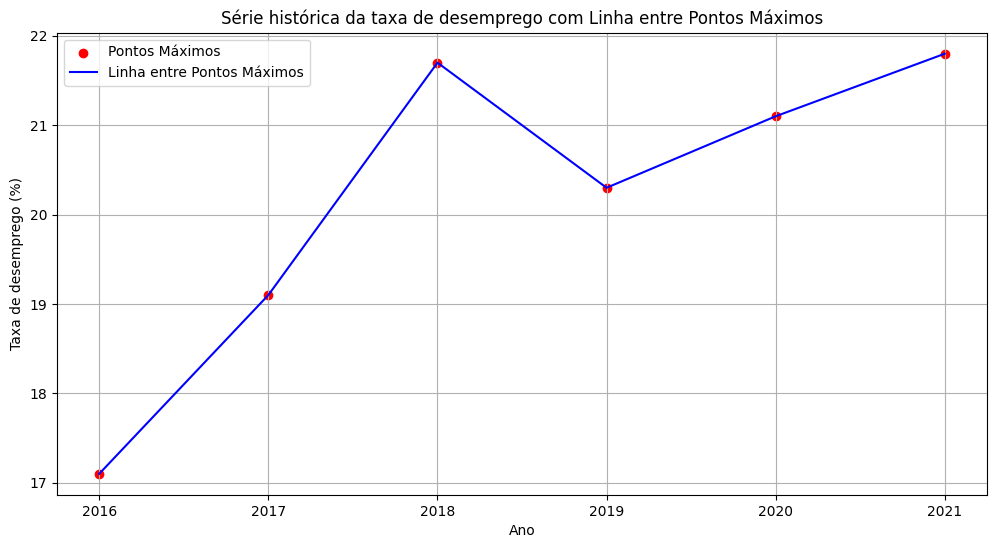

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'df_TaxaDesemprego' seja o seu DataFrame com as colunas 'ANO' e 'TX_DESOCUPACAO'

# Convertendo a coluna 'ANO' para valores numéricos
df_TaxaDesemprego['ANO'] = pd.to_numeric(df_TaxaDesemprego['ANO'], errors='coerce')

# Filtrar para incluir apenas dados a partir de 2016
df_TaxaDesemprego_filtrado = df_TaxaDesemprego[df_TaxaDesemprego['ANO'] >= 2016]

# Encontrar os índices dos valores máximos em cada ano
indices_maximos = df_TaxaDesemprego_filtrado.groupby('ANO')['TX_DESOCUPACAO'].idxmax()

# Criar um DataFrame contendo apenas os pontos máximos
pontos_maximos = df_TaxaDesemprego_filtrado.loc[indices_maximos]

# Criar um gráfico de dispersão com apenas os pontos máximos
plt.figure(figsize=(12, 6))
plt.scatter(pontos_maximos['ANO'], pontos_maximos['TX_DESOCUPACAO'], color='red', label='Pontos Máximos')

# Criar uma linha conectando os pontos máximos
plt.plot(pontos_maximos['ANO'], pontos_maximos['TX_DESOCUPACAO'], linestyle='-', color='blue', label='Linha entre Pontos Máximos')

plt.title('Série histórica da taxa de desemprego com Linha entre Pontos Máximos')
plt.xlabel('Ano')
plt.ylabel('Taxa de desemprego (%)')
plt.grid(True)
plt.legend()
plt.show()


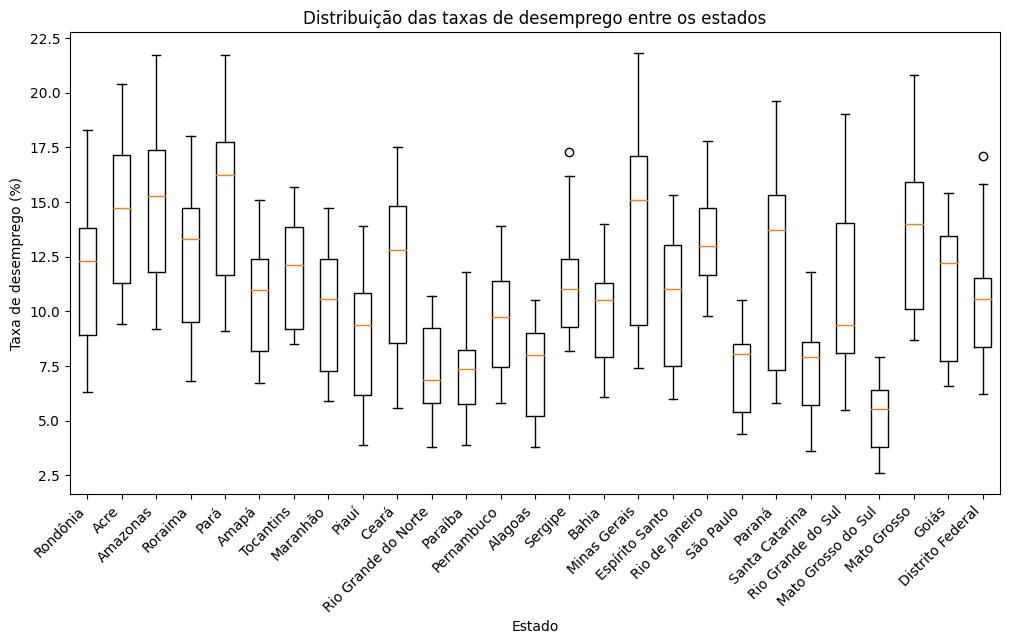

In [24]:
plt.figure(figsize=(12, 6))
plt.boxplot([group['TX_DESOCUPACAO'] for name, group in df_TaxaDesemprego_filtrada.groupby('NM_UF')])
plt.title('Distribuição das taxas de desemprego entre os estados')
plt.xlabel('Estado')
plt.ylabel('Taxa de desemprego (%)')
plt.xticks(range(1, len(df_TaxaDesemprego_filtrada['NM_UF'].unique()) + 1),
           df_TaxaDesemprego_filtrada['NM_UF'].unique(), rotation=45, ha='right')
plt.show()

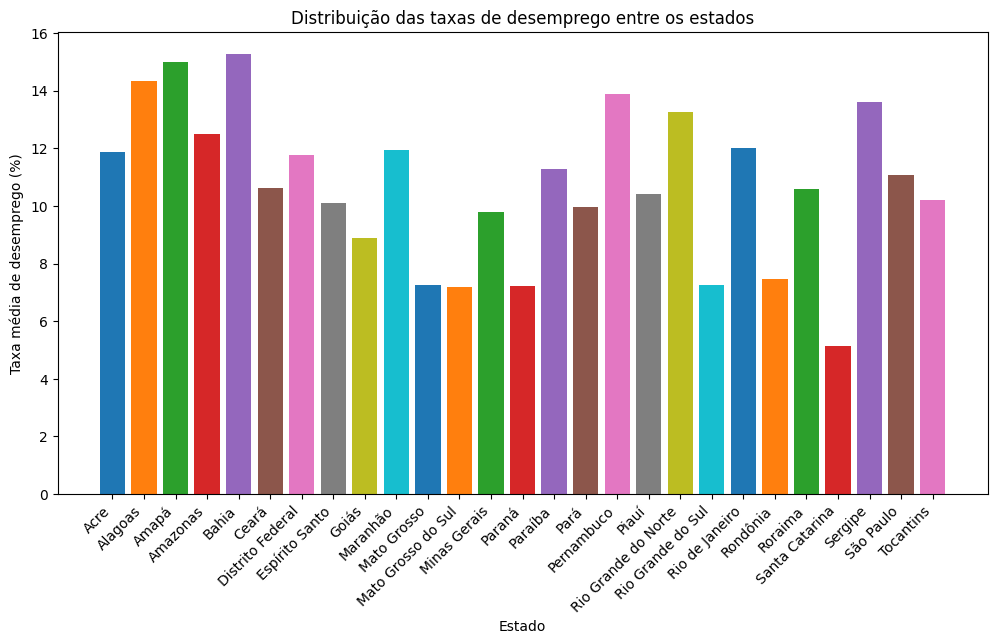

In [25]:
import matplotlib.pyplot as plt

# Se necessário, substitua 'TX_DESOCUPACAO' pelo nome da coluna correta em seu conjunto de dados
plt.figure(figsize=(12, 6))
for name, group in df_TaxaDesemprego_filtrada.groupby('NM_UF'):
    plt.bar(name, group['TX_DESOCUPACAO'].mean())  # Usando a média das taxas de desemprego para cada estado

plt.title('Distribuição das taxas de desemprego entre os estados')
plt.xlabel('Estado')
plt.ylabel('Taxa média de desemprego (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


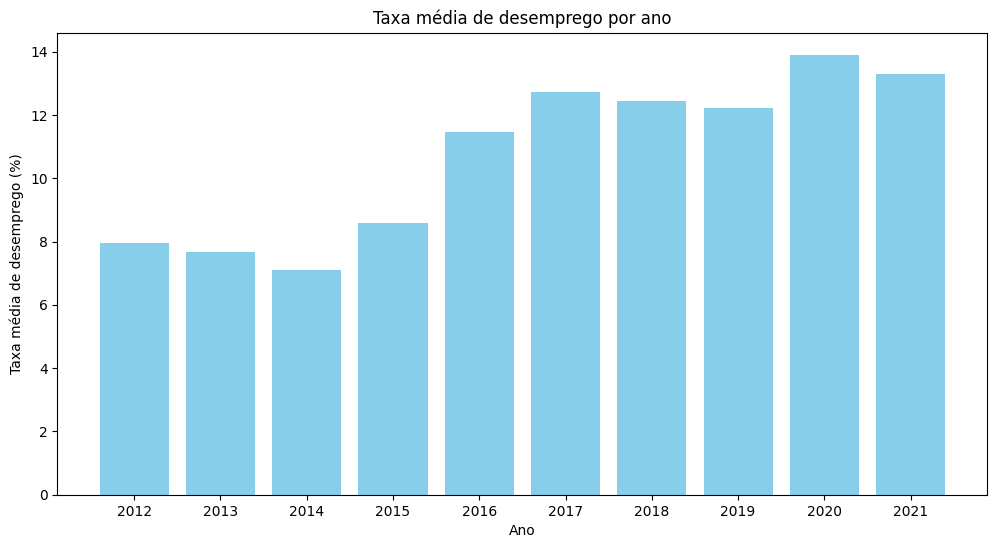

In [26]:
plt.figure(figsize=(12, 6))
average_unemployment = df_TaxaDesemprego_filtrada.groupby('ANO')['TX_DESOCUPACAO'].mean()
plt.bar(average_unemployment.index, average_unemployment, color='skyblue')
plt.title('Taxa média de desemprego por ano')
plt.xlabel('Ano')
plt.ylabel('Taxa média de desemprego (%)')
plt.show()

In [27]:
df_salarioMinimo 

,Ano,mês,Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1940,7,"1108,328565",NaN,NaN,NaN
1,1940,8,"1105,23391",NaN,NaN,NaN
2,1940,9,"1104,240094",NaN,NaN,NaN
3,1940,10,"1086,95747",NaN,NaN,NaN
4,1940,11,"1062,519521",NaN,NaN,NaN
...,...,...,...,...,...,...
992,2023,3,"1311,118528",NaN,NaN,NaN
993,2023,4,"1304,206481",NaN,NaN,NaN
994,2023,5,"1317,493378",NaN,NaN,NaN
995,2023,6,"1318,811565",NaN,NaN,NaN


In [28]:
df_salarioMinimo.columns.values

array(['Ano', 'mês',
       'Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype=object)

In [29]:
df_salarioMinimo_colunas = ['Ano', 'mês', 'Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12']
df_salarioMinimo_filtrada = df_salarioMinimo.filter(items=df_salarioMinimo_colunas)
df_salarioMinimo_filtrada

,Ano,mês,Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12
0,1940,7,"1108,328565"
1,1940,8,"1105,23391"
2,1940,9,"1104,240094"
3,1940,10,"1086,95747"
4,1940,11,"1062,519521"
...,...,...,...
992,2023,3,"1311,118528"
993,2023,4,"1304,206481"
994,2023,5,"1317,493378"
995,2023,6,"1318,811565"


In [30]:
import pandas as pd

df_salarioMinimo_filtrada['Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12'] = \
    pd.to_numeric(df_salarioMinimo_filtrada['Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12'].str.replace(',', '.'))

result = df_salarioMinimo_filtrada.groupby('Ano')['Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12'].mean()

print(result)



Ano
1940    1091.380710
1941     994.419837
1942     893.007789
1943     881.600197
1944     923.859013
           ...     
2019    1286.128572
2020    1299.312994
2021    1256.303493
2022    1264.068948
2023    1317.258438
Name: Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12, Length: 84, dtype: float64


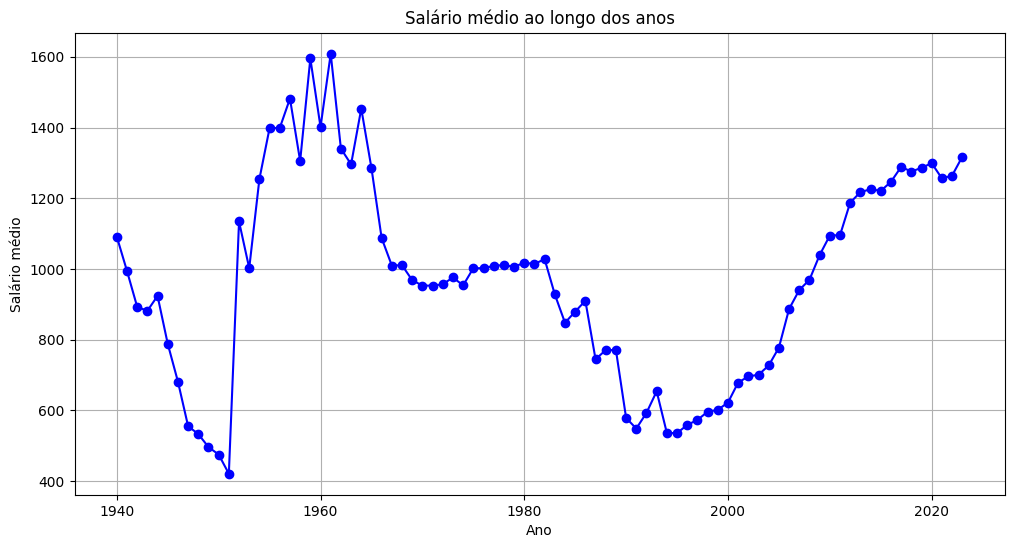

In [31]:
import matplotlib.pyplot as plt

# Assuming 'result' is your DataFrame with the years and average salaries
# If not, replace 'result' with your DataFrame

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(result.index, result.values, marker='o', linestyle='-', color='b')
plt.title('Salário médio ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Salário médio')
plt.grid(True)
plt.show()


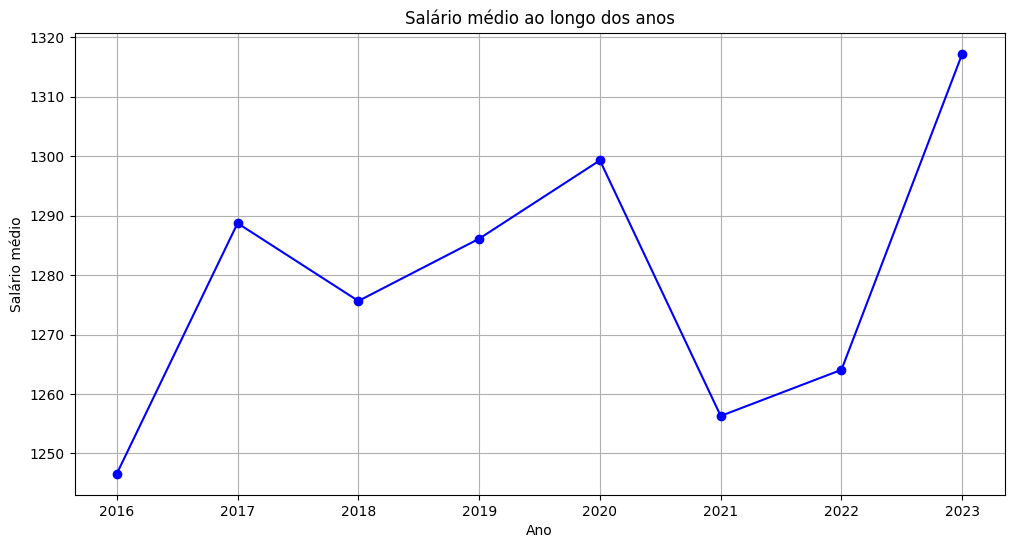

In [32]:
import matplotlib.pyplot as plt

# Supondo que 'result' seja o DataFrame resultante do agrupamento e cálculo da média
result = df_salarioMinimo_filtrada.groupby('Ano')['Salário mínimo real - R$ (do último mês) - Instituto de Pesquisa Econômica Aplicada - GAC12_SALMINRE12'].mean()

# Filtrar para incluir apenas dados a partir de 2016
result = result[result.index >= 2016]

# Criar um gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(result.index, result.values, marker='o', linestyle='-', color='b')
plt.title('Salário médio ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Salário médio')
plt.grid(True)
plt.show()


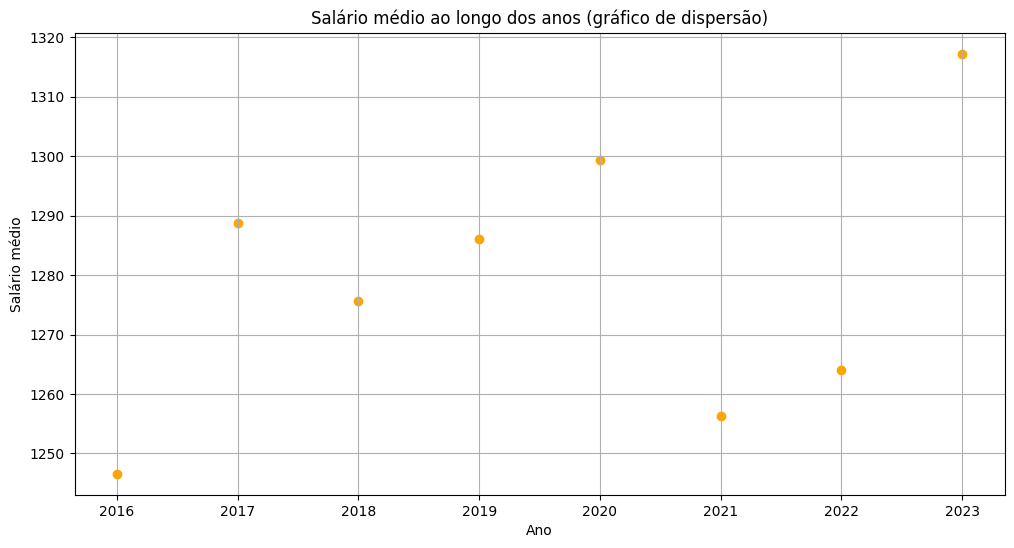

In [33]:

plt.figure(figsize=(12, 6))
plt.scatter(result.index, result.values, color='orange', marker='o')
plt.title('Salário médio ao longo dos anos (gráfico de dispersão)')
plt.xlabel('Ano')
plt.ylabel('Salário médio')
plt.grid(True)
plt.show()
